# Анализа и визуализација података



## Анализа података

Анализа података је процес у коме вршимо увид у податке, њихово чишћење, трансформисање и моделирање са циљем откривања корисних информација, које нас воде до одређених закључака и омогућавају нам лакше доношење одлука. На интернету можете пронаћи разне скупове података које можете користити за вјежбу. За анализу података користићемо *pandas*.

[*pandas*](https://pandas.pydata.org/pandas-docs/stable/index.html) представља брзу, моћну, флексибилну и бесплатну Пајтон библиотеку отвореног кода креирану од стране [*Wes McKinney*](https://wesmckinney.com/)-а, која пружа високе перфомансе за цијели процес анализе података. Активно се развија, има јаку заједницу и велику подршку.

### *pandas* структуре података

Упознаћемо сада двије најважније *pandas* структуре података:

- *Series* (низ података)
- *DataFrame* (оквир са подацима)

#### *Series*

[*Series*](https://pandas.pydata.org/pandas-docs/stable/reference/series.html) представља једнодимензионални објекат који може да складишти вриједности било којег типа, слично колони у табели. Свакој вриједности ће бити додијељен индекс од 0 до *n*, гдје *n* представља за 1 мању вриједност од броја који представља величину од *Series*.


Прво ћемо импортовати Пајтон библиотеку *pandas*.

In [1]:
import pandas as pd

Креираћемо сада један објекат типа *Series*.

In [2]:
s=pd.Series([10,'PyLadies',2.54,-100])

s

0          10
1    PyLadies
2        2.54
3        -100
dtype: object

Вриједностима приступамо преко индекса на сљедећи начин.

In [3]:
s[1]

'PyLadies'

In [4]:
s[1:3]

1    PyLadies
2        2.54
dtype: object

Индексе можемо и сами креирати.

In [5]:
s.index = ['Red 1', 'Red 2', 'Red 3', 'Red 4'] 
s

Red 1          10
Red 2    PyLadies
Red 3        2.54
Red 4        -100
dtype: object

Такође можемо приликом креирања објеката типа *Series* да задамо индексе.

In [6]:
vrijednosti=[10,'PyLadies',2.54,-100]
indeksi=['Red 1', 'Red 2', 'Red 3', 'Red 4']
s1=pd.Series(vrijednosti, index=indeksi)
#s1=pd.Series([10,'PyLadies',2.54,-100], index=['Red 1', 'Red 2', 'Red 3', 'Red 4'])
s1

Red 1          10
Red 2    PyLadies
Red 3        2.54
Red 4        -100
dtype: object

Ако имамо податке сачуване у Пајтон ријечнику, помоћу њих такође можемо креирати објекат типа *Series*. 

In [7]:
podaci={'Red 1':10, 'Red 2':'PyLadies', 'Red 3':2.54, 'Red 4':-100}
s2=pd.Series(podaci)
s2

Red 1          10
Red 2    PyLadies
Red 3        2.54
Red 4        -100
dtype: object

Вриједностима преко назива индекса приступамо на сљедећи начин, преко метода и [.loc[]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html), [.iloc[]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) и [.where[]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.where.html).

In [8]:
s.loc['Red 2']

'PyLadies'

In [9]:
s.loc[s=='PyLadies']

Red 2    PyLadies
dtype: object

In [10]:
s[s=='PyLadies']

Red 2    PyLadies
dtype: object

In [11]:
s.where(s=='PyLadies')

Red 1         NaN
Red 2    PyLadies
Red 3         NaN
Red 4         NaN
dtype: object

In [12]:
s.loc['Red 1':'Red 4']

Red 1          10
Red 2    PyLadies
Red 3        2.54
Red 4        -100
dtype: object

Вриједности можемо и даље приступати преко индекса од 0 до *n*, гдје n представља за 1 мању вриједност од броја који представља величину од *Series*.

In [13]:
s.iloc[1]

'PyLadies'

In [14]:
s.iloc[0:3]

Red 1          10
Red 2    PyLadies
Red 3        2.54
dtype: object

#### *DataFrame*

[*DataFrame*](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) представља табеларну дводимензионалну структуру података са колонама и редовима са потенцијално различитим типовима података. Састоји се од података, индекса и колона. Такође се може посматрати и као група *Series* објеката који дијеле исти индекс.

Креираћемо сада један објекат типа *DataFrame*.

In [15]:
podaci = {
    'jabuke': [5, 2, 0, 3], 
    'narandze': [0, 3, 5, 2]
}

In [16]:
kupovina = pd.DataFrame(podaci)

kupovina

,jabuke,narandze
0,5,0
1,2,3
2,0,5
3,3,2


Индексе можемо и сами креирати.

In [17]:
kupovina = pd.DataFrame(podaci, index=['Marko', 'Milan', 'Jelena', 'Petar'])

kupovina

,jabuke,narandze
Marko,5,0
Milan,2,3
Jelena,0,5
Petar,3,2


Табеле можемо чувати у фајловима разних формата као и учитавати их из њих. [Овдје](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) можете погледати листу формата и метода који се користе за упис/читање.

Као примјер ћемо користити *.csv* фајл. На исти начин се ради и са *Excel* фајлом.

In [18]:
kupovina.to_csv('nova_kupovina.csv')

In [19]:
nova_kupovina_csv = pd.read_csv('nova_kupovina.csv', index_col=0)

nova_kupovina_csv

,jabuke,narandze
Marko,5,0
Milan,2,3
Jelena,0,5
Petar,3,2


In [20]:
kupovina.to_excel('nova_kupovina.xlsx')

In [21]:
nova_kupovina_excel = pd.read_excel('nova_kupovina.xlsx', index_col=0)

nova_kupovina_excel

,jabuke,narandze
Marko,5,0
Milan,2,3
Jelena,0,5
Petar,3,2


Вриједностима у табели можемо приступати на сличан начин као и код објеката типа *Series*, преко индекса, назива колона и одређених услова. Такође можемо вршити селекцију података на основу постављених услова.

In [22]:
kupovina.loc['Marko']

jabuke      5
narandze    0
Name: Marko, dtype: int64

In [23]:
kupovina.iloc[0]

jabuke      5
narandze    0
Name: Marko, dtype: int64

In [24]:
kupovina['jabuke']

Marko     5
Milan     2
Jelena    0
Petar     3
Name: jabuke, dtype: int64

In [25]:
kupovina['narandze']

Marko     0
Milan     3
Jelena    5
Petar     2
Name: narandze, dtype: int64

In [26]:
kupovina[['jabuke','narandze']]

,jabuke,narandze
Marko,5,0
Milan,2,3
Jelena,0,5
Petar,3,2


In [27]:
kupovina['jabuke'].loc['Marko']

5

In [28]:
kupovina['narandze'].loc['Marko']

0

In [29]:
kupovina.loc[kupovina['jabuke']==3]

,jabuke,narandze
Petar,3,2


In [30]:
kupovina['jabuke'].loc[kupovina['narandze']>0]

Milan     2
Jelena    0
Petar     3
Name: jabuke, dtype: int64

In [31]:
kupovina.iloc[0:2,0]

Marko    5
Milan    2
Name: jabuke, dtype: int64

In [32]:
kupovina['jabuke'] > 0

Marko      True
Milan      True
Jelena    False
Petar      True
Name: jabuke, dtype: bool

In [33]:
kupljene_jabuke = (kupovina['jabuke'] > 0)

kupljene_jabuke.head()

Marko      True
Milan      True
Jelena    False
Petar      True
Name: jabuke, dtype: bool

In [34]:
kupovina[kupovina['jabuke'] > 0]

,jabuke,narandze
Marko,5,0
Milan,2,3
Petar,3,2


Увјеримо се сада да је свака колона објекат типа *Series*.

In [35]:
type(kupovina['jabuke'])

pandas.core.series.Series

### Рад са подацима 

Податке можемо чистити, трансформисати и анализирати.

Радићемо сада са [*IMDB* скупом података](https://www.kaggle.com/PromptCloudHQ/imdb-data) који садржи 1000 популарних филмова који су изашли у временском периоду од 2006. до 2016. године.

Већ смо импортовали Пајтон библиотеку *pandas*.

In [36]:
filmovi = pd.read_csv("IMDB-Movie-Data.csv")

#### Преглед података

Прегледајмо наше податке. Погледајмо првих 5 редова наше табеле. 

In [37]:
filmovi.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


 Погледајмо првих 7 редова наше табеле.

In [38]:
filmovi.head(7)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0


Погледајмо посљедња 3 реда наше табеле.

In [39]:
filmovi.tail(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


Погледајмо неке основне информације о нашем скупу података.

In [40]:
filmovi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


Видимо да наша табела има 1000 редова и 12 колона. Такође видимо називе колона као и типове података које садрже. Број редова и колона можемо утврдити и на сљедећи начин.

In [41]:
filmovi.shape

(1000, 12)

#### Уклањање дупликата

Удуплаћемо сада наш скуп података како би имали дупликате које треба да уклонимо. 

In [42]:
filmovi_ = filmovi.append(filmovi)

filmovi_.shape

(2000, 12)

Видимо да сада у табели имамо 2000 редова, број колона је остао непромијењен. Метод [*.append()*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.append.html) додаје нове редове у већ постојећу табелу. Уклонимо сада дупликате уз помоћ метода [*.drop_duplicates()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html). 

In [43]:
filmovi_ = filmovi_.drop_duplicates()

filmovi_.shape

(1000, 12)

Видимо да сада имамо у табели 1000 редова, што значи да смо успјешно уклонили дупликате. Ови методи враћају копију нашег *DateFrame*-a. Ми га можемо модификовати и директно, користећи кључну ријеч *inplace* као аргумент метода.

In [44]:
filmovi_ = filmovi.append(filmovi)

filmovi_.drop_duplicates(inplace=True)

Користећи кључну ријеч *keep* као аргумент метода можемо да уклонимо дупликате као и саме оригинале.

In [45]:
filmovi_ = filmovi.append(filmovi)

filmovi_.drop_duplicates(inplace=True, keep=False)

filmovi_.shape

(0, 12)

#### Чишћење имена колона 

Често имена колона иако дјелују како треба имају празне карактере на крају или неке друге симболе, који су настали углавном грешком у куцању, па се јавља грешка *Key Error* приликом селекције података из колоне по њеном имену. Из тог разлога је добро да знамо како да сами преименујемо имена колона уколико је то потребно. Погледајмо имена колона и промијенимо их уз помоћ методе [*.rename()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html).

In [46]:
filmovi.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [47]:
filmovi.rename(columns={
        'Runtime (Minutes)': 'Runtime_minutes', 
        'Revenue (Millions)': 'Revenue_millions'
    }, inplace=True)

In [48]:
filmovi.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime_minutes', 'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

Видимо да смо успјешно промијенили имена колона. Имена колона можемо такође промијенити додјељивањем листе са називима колона промјењивој *filmovi.columns*.

In [49]:
filmovi.columns = ['rank', 'title', 'genre', 'description', 'director', 'actors', 'year', 'runtime_minutes', 
                     'rating', 'votes', 'revenue_millions', 'metascore']


filmovi.columns

Index(['rank', 'title', 'genre', 'description', 'director', 'actors', 'year',
       'runtime_minutes', 'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

То исто смо могли урадити уз помоћ компресије листе.

~~~python
filmovi.columns = [col.lower() for col in filmovi]

filmovi.columns
~~~

Иначе, компресија листа се често користи у раду са подацима (за претварање великих слова у мала, уклањање специјалних карактера, замјену карактера одговарајућим карактерима итд).

#### Рад са недостајућим вриједностима

У раду са подацима се често сусрећемо са недостајућим вриједностима. Понекад корисници забораве да унесу све податке или се подаци загубе приликом увожења из базе података, док је понекад у питању програмска или нека друга ненамјерна грешка. У неким случајевима, подаци су намјерно изоставаљени из неких нама познатих или непознатих разлога.

Прије чишћења скупа података било би добро да прегледамо податке да имамо неку општу слику. У нашем случају то значи да ћемо отворити *csv* табелу и прегледати је да утврдимо ког су типа недостајуће или недефинисане вриједности.

Погледајмо сада да ли има недостајућих вриједности. Користићемо методу [*.isnull()*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) у комбинацији са методом [*.sum()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html).

In [50]:
filmovi.isnull()

,rank,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue_millions,metascore
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,True,False
996,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,True,False


Да би утврдили број недостајућих вриједности у колонама користићемо методу за сумирање.

In [51]:
filmovi.isnull().sum()

rank                  0
title                 0
genre                 0
description           0
director              0
actors                0
year                  0
runtime_minutes       0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

Видимо да колоне *revenue_millions* и *metascore* имају 128 и 64 недостајућих вриједности, редом.

Понекад имамо нестандардне недостајуће вриједности, нпр.*pandas* препознаје стринг "*NA*" као недостајућу вриједност; међутим, стрингове "*n/a*", "*na*" и "*--*" не препознаје као такве а можда их је неко унијео у табелу (што се лако утврди прегледом података). У том случају правимо листу недостајућих вриједности и просљеђујемо је методи за учитавање података.

~~~python
# Pravimo listu nedostajucih vrijednosti  
nedostajuce_vrijednosti = ["n/a", "na", "--"]  
filmovi_ = pd.read_csv("IMDB-Movie-Data.csv", na_values = nedostajuce_vrijednosti)
~~~

Сада се сусрећемо са сљедећом дилемом, да ли уклонити редове/колоне у којима се налазе недостајуће вриједности или замијенити недостајуће вриједности уметањем одговарајућих садржаја. 

Уклањање је препоручљиво у случају када имамо мали број података недостајућих података. У осталим случајевима вршимо замјену недостајућих вриједности. Уклонимо сада редове који садрже недостајуће вриједности.

In [52]:
filmovi_ = pd.read_csv("IMDB-Movie-Data.csv")

filmovi_.dropna(inplace=True)

filmovi_.shape

(838, 12)

Такође можемо уклонити колоне које садрже недостајуће вриједности, просљеђујући *axis=1* као аргумент методе [*.dropna()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html).

In [53]:
filmovi_ = pd.read_csv("IMDB-Movie-Data.csv")

filmovi_.dropna(axis=1, inplace=True)

filmovi_.shape

(1000, 10)

Пошто не желимо да губимо остале податке у редовима/колонама због недостајућих вриједности извршићемо уметање вриједности аритметичке средине, медијане или мода.

Извршићемо [визуализацију](https://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html) података из колона са недостајућим вриједностима помоћу *box plot* дијаграма и хистограма, како бисмо се лакше одлучили коју средњу вриједност да уметнемо.

In [54]:
revenue = filmovi['revenue_millions']

metascore = filmovi['metascore']

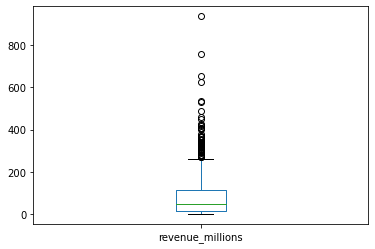

In [55]:
filmovi['revenue_millions'].plot(kind="box");

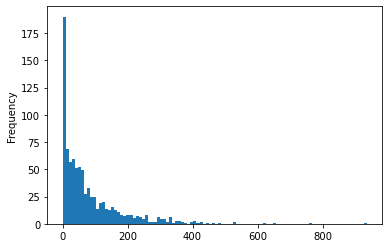

In [56]:
revenue.plot(kind="hist", bins=100);

Видимо да вриједности нису симетрично распоређене, тако да нећемо уметнути вриједност аритметичке средине. Уметнућемо вриједности медијане или мода.

Израчунајмо вриједности медијане и мода те погледајмо описну статистику за нашу колону.

In [57]:
revenue_med = revenue.median()

revenue_med

47.985

In [58]:
revenue_mod = revenue.mode()[0]

revenue_mod

0.03

In [59]:
revenue.describe()

count    872.000000
mean      82.956376
std      103.253540
min        0.000000
25%       13.270000
50%       47.985000
75%      113.715000
max      936.630000
Name: revenue_millions, dtype: float64

Очигледно је медијана као средња вриједност најбољи избор за уметање умјесто недостајућих вриједности.

In [60]:
revenue.fillna(revenue_med, inplace=True)

filmovi.isnull().sum()

rank                 0
title                0
genre                0
description          0
director             0
actors               0
year                 0
runtime_minutes      0
rating               0
votes                0
revenue_millions     0
metascore           64
dtype: int64

Видимо да смо успјешно уметнули вриједност медијане у колону *revenue_millions*, умјесто недостајућих вриједности. 

Извршимо сада визуализацију података из колоне *metascore*.

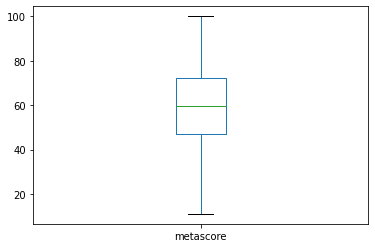

In [61]:
metascore.plot(kind="box");

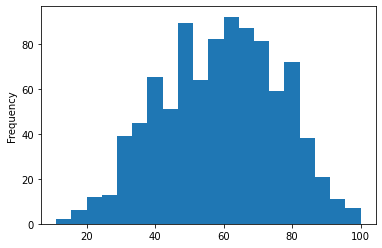

In [62]:
metascore.plot(kind="hist", bins=20);

Овдје видимо да вриједности јесу симетрично распоређене, тако да ћемо уметнути вриједност аритметичке средине.

In [63]:
metascore_as = metascore.mean()

metascore_as

58.98504273504273

In [64]:
metascore.fillna(metascore_as, inplace=True)

filmovi.isnull().sum()

rank                0
title               0
genre               0
description         0
director            0
actors              0
year                0
runtime_minutes     0
rating              0
votes               0
revenue_millions    0
metascore           0
dtype: int64

Видимо да смо успјешно уметнули вриједност аритметичке средине у колону *metascore*, умјесто недостајућих вриједности.

Описну статистику можемо видјети за читаву табелу као што смо видјели за једну колону.

In [65]:
filmovi.describe()

,rank,year,runtime_minutes,rating,votes,revenue_millions,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,78.480040,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,97.118097,16.634858
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.750000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,58.985043
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,71.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


Такође можемо видјети узајамно повезаност међу подацима који су представљени у колонама.

In [66]:
filmovi.corr()

,rank,year,runtime_minutes,rating,votes,revenue_millions,metascore
rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.259607,-0.185159
year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.146589,-0.076077
runtime_minutes,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.272955,0.202239
rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.218448,0.604723
votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.638758,0.318116
revenue_millions,-0.259607,-0.146589,0.272955,0.218448,0.638758,1.000000,0.142058
metascore,-0.185159,-0.076077,0.202239,0.604723,0.318116,0.142058,1.000000


Што су бројеви ближи броју 1.000000, узајамна повезаност међу подацима посматраних колона је већа и обратно. Највећа узајамна повезаност је између *votes* и *revenue_millions* а најмања између *metascore* и *year*, што се може приказати и графички.

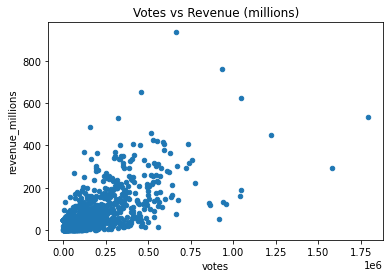

In [67]:
filmovi.plot(kind='scatter', x='votes', y='revenue_millions', title='Votes vs Revenue (millions)');

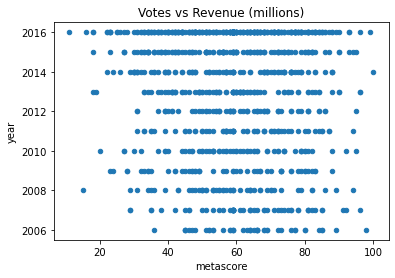

In [68]:
filmovi.plot(kind='scatter', x='metascore', y='year', title='Votes vs Revenue (millions)');

### Трансформација и анализа података

Прије него што почнемо да анализирамо податке са циљем да пронађемо одговоре на одређена питања, извршићемо трансформацију података. Прегледајмо податке још једном.

In [69]:
filmovi

,rank,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue_millions,metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.120,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.320,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.020,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,47.985,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.540,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.010,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,47.985,22.0


Податке у врстама/колонама можемо мијењати примјеном одговарајуће уграђене или кориснички дефинисане функције, помоћу метода [*.apply()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html). Промијенимо прво последњу колону тако да садржи цјелобројне податке примјеном уграђене функције *int*.

In [70]:
filmovi['metascore']=filmovi['metascore'].apply(int)

Исто то урадимо и са претпоследњом колоном примјеном наше функције *cijeli*, коју ћемо сами да направимо.

In [71]:
def cijeli(broj):
    return int(broj * 100000)

filmovi['revenue_millions']=filmovi['revenue_millions'].apply(cijeli)

Сходно томе, промијенимо и назив претпоследње колоне те затим прегледајмо податке.

In [72]:
filmovi.rename(columns={
        'revenue_millions': 'revenue'
    }, inplace=True)

filmovi

,rank,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue,metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,33313000,76
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,12646000,65
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,13812000,62
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,27032000,59
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,32502000,40
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,4798500,45
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,1754000,46
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,5801000,50
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,4798500,22


Потражимо сада одговоре на одређена питања. 

Уколико желите да сазнате нешто више о некој вама непознатој методи, будите слободни да претражите [*pandas* документацију](https://pandas.pydata.org/pandas-docs/stable/index.html). Такође, како бисте стекли нова или проширили постојећа знања, користите интернет претраживач да пронађете вама одговарајуће изворе за истраживање и учење.

Подразумијева се да имате одређена предзнања из Пајтона.

#### Колико имамо наслова у нашој табели?

In [73]:
naslovi=filmovi['title']

len(naslovi)

1000

#### Који наслов је најдужи а који најкраћи?

In [74]:
filmovi['len_title']=filmovi['title'].apply(len)

In [75]:
filmovi.head()

,rank,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue,metascore,len_title
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,33313000,76,23
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,12646000,65,10
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,13812000,62,5
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,27032000,59,4
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,32502000,40,13


In [76]:
#pd.set_option('display.max_colwidth', None)

filmovi.sort_values('len_title', ascending=False).head(1)

,rank,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue,metascore,len_title
259,260,Norman: The Moderate Rise and Tragic Fall of a...,"Drama,Thriller",Norman Oppenheimer is a small time operator wh...,Joseph Cedar,"Richard Gere, Lior Ashkenazi, Michael Sheen,Ch...",2016,118,7.1,664,227000,76,61


In [77]:
najduzi=filmovi.sort_values('len_title', ascending=False)

print(najduzi['title'].iloc[0])

Norman: The Moderate Rise and Tragic Fall of a New York Fixer


In [78]:
filmovi.sort_values('len_title').head(1)

,rank,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue,metascore,len_title
499,500,Up,"Animation,Adventure,Comedy",Seventy-eight year old Carl Fredricksen travel...,Pete Docter,"Edward Asner, Jordan Nagai, John Ratzenberger,...",2009,96,8.3,722203,29298000,88,2


In [79]:
najkraci=filmovi.sort_values('len_title')

print(najkraci['title'].iloc[0])

Up


In [80]:
#pd.reset_option('use_inf_as_na')

In [81]:
filmovi.drop('len_title',
  axis='columns', inplace=True)

filmovi.head()

,rank,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue,metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,33313000,76
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,12646000,65
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,13812000,62
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,27032000,59
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,32502000,40


#### Који филм има најдуже а који најкраће трајање?

In [82]:
filmovi.sort_values('runtime_minutes', ascending=False).head(1)

,rank,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue,metascore
828,829,Grindhouse,"Action,Horror,Thriller",Quentin Tarantino and Robert Rodriguez's homag...,Robert Rodriguez,"Kurt Russell, Rose McGowan, Danny Trejo, Zoë Bell",2007,191,7.6,160350,2503000,58


In [83]:
najduze=filmovi.sort_values('runtime_minutes', ascending=False)

print(najduze['title'].iloc[0])

Grindhouse


In [84]:
filmovi.sort_values('runtime_minutes').head(1)

,rank,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue,metascore
793,794,Ma vie de Courgette,"Animation,Comedy,Drama","After losing his mother, a young boy is sent t...",Claude Barras,"Gaspard Schlatter, Sixtine Murat, Paulin Jacco...",2016,66,7.8,4370,28999,85


In [85]:
najkrace=filmovi.sort_values('runtime_minutes')

print(najkrace['title'].iloc[0])

Ma vie de Courgette


#### Који филмови су најбољи по мишљењу корисника?

In [86]:
najbolji_korisnici=filmovi.sort_values('rating', ascending=False)

najbolji_korisnici.head(10)

,rank,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue,metascore
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,53332000,82
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,29257000,74
117,118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,1115000,58
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,18799000,74
96,97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,468000,79
249,250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,1318000,57
133,134,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,1309000,88
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,5308000,66
99,100,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,13237000,85
991,992,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,120000,42


In [87]:
print(najbolji_korisnici['title'].iloc[0:10].to_string(index=False))

  The Dark Knight
        Inception
           Dangal
     Interstellar
    Kimi no na wa
 The Intouchables
         Whiplash
     The Prestige
     The Departed
 Taare Zameen Par


#### Који филмови су најбољи по мишљењу критичара?

In [88]:
najbolji_kriticari=filmovi.sort_values('metascore', ascending=False)

najbolji_kriticari.head(10)

,rank,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue,metascore
656,657,Boyhood,Drama,"The life of Mason, from early childhood to his...",Richard Linklater,"Ellar Coltrane, Patricia Arquette, Ethan Hawke...",2014,165,7.9,286722,2536000,100
41,42,Moonlight,Drama,"A chronicle of the childhood, adolescence and ...",Barry Jenkins,"Mahershala Ali, Shariff Earp, Duan Sanderson, ...",2016,111,7.5,135095,2785000,99
230,231,Pan's Labyrinth,"Drama,Fantasy,War","In the falangist Spain of 1944, the bookish yo...",Guillermo del Toro,"Ivana Baquero, Ariadna Gil, Sergi López,Maribe...",2006,118,8.2,498879,3761999,98
111,112,12 Years a Slave,"Biography,Drama,History","In the antebellum United States, Solomon North...",Steve McQueen,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi...",2013,134,8.1,486338,5667000,96
489,490,Ratatouille,"Animation,Comedy,Family",A rat who can cook makes an unusual alliance w...,Brad Bird,"Brad Garrett, Lou Romano, Patton Oswalt,Ian Holm",2007,111,8.0,504039,20644000,96
21,22,Manchester by the Sea,Drama,A depressed uncle is asked to take care of his...,Kenneth Lonergan,"Casey Affleck, Michelle Williams, Kyle Chandle...",2016,137,7.9,134213,4770000,96
509,510,Gravity,"Drama,Sci-Fi,Thriller",Two astronauts work together to survive after ...,Alfonso Cuarón,"Sandra Bullock, George Clooney, Ed Harris, Ort...",2013,91,7.8,622089,27408000,96
406,407,Zero Dark Thirty,"Drama,History,Thriller",A chronicle of the decade-long hunt for al-Qae...,Kathryn Bigelow,"Jessica Chastain, Joel Edgerton, Chris Pratt, ...",2012,157,7.4,226661,9572000,95
324,325,The Social Network,"Biography,Drama",Harvard student Mark Zuckerberg creates the so...,David Fincher,"Jesse Eisenberg, Andrew Garfield, Justin Timbe...",2010,120,7.7,510100,9692000,95
501,502,Carol,"Drama,Romance",An aspiring photographer develops an intimate ...,Todd Haynes,"Cate Blanchett, Rooney Mara, Sarah Paulson, Ky...",2015,118,7.2,77995,25000,95


In [89]:
print(najbolji_kriticari['title'].iloc[0:10].to_string(index=False))

               Boyhood
             Moonlight
       Pan's Labyrinth
      12 Years a Slave
           Ratatouille
 Manchester by the Sea
               Gravity
      Zero Dark Thirty
    The Social Network
                 Carol


In [90]:
najbolji=filmovi.sort_values(['rating','metascore'], ascending=False)

najbolji.head(10)

,rank,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue,metascore
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,53332000,82
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,29257000,74
117,118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,1115000,58
96,97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,468000,79
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,18799000,74
249,250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,1318000,57
476,477,The Lives of Others,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,1128000,89
133,134,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,1309000,88
99,100,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,13237000,85
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,44813000,78


#### Који филмови су освојили највише гласова?

In [91]:
najbolji_glasovi=filmovi.sort_values(['votes'], ascending=False)

najbolji_glasovi.head(10)

,rank,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue,metascore
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,53332000,82
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,29257000,74
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,44813000,78
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,18799000,74
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,62328000,69
144,145,Django Unchained,"Drama,Western","With the help of a German bounty hunter , a fr...",Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",2012,165,8.4,1039115,16280000,81
77,78,Inglourious Basterds,"Adventure,Drama,War","In Nazi-occupied France during World War II, a...",Quentin Tarantino,"Brad Pitt, Diane Kruger, Eli Roth,Mélanie Laurent",2009,153,8.3,959065,12052000,69
99,100,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,13237000,85
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,76051000,83
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,5308000,66


In [92]:
print(najbolji_glasovi['title'].iloc[0:10].to_string(index=False))

       The Dark Knight
             Inception
 The Dark Knight Rises
          Interstellar
          The Avengers
      Django Unchained
  Inglourious Basterds
          The Departed
                Avatar
          The Prestige


#### Који филмови су најбољи по мишљењу корисника и критичара?

In [93]:
najbolji=filmovi.sort_values(['rating','metascore'], ascending=False)

najbolji.head(10)

,rank,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue,metascore
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,53332000,82
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,29257000,74
117,118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,1115000,58
96,97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,468000,79
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,18799000,74
249,250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,1318000,57
476,477,The Lives of Others,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,1128000,89
133,134,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,1309000,88
99,100,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,13237000,85
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,44813000,78


In [94]:
print(najbolji['title'].iloc[0:10].to_string(index=False))

       The Dark Knight
             Inception
                Dangal
         Kimi no na wa
          Interstellar
      The Intouchables
   The Lives of Others
              Whiplash
          The Departed
 The Dark Knight Rises


#### Који филмови су остварили највећу зараду?

In [95]:
najbolji_zarada=filmovi.sort_values('revenue', ascending=False)

najbolji_zarada.head(10)

,rank,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue,metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,93663000,81
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,76051000,83
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,65217999,59
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,62328000,69
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,53332000,82
12,13,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,53216999,65
119,120,Finding Dory,"Animation,Adventure,Comedy","The friendly but forgetful blue tang fish, Dor...",Andrew Stanton,"Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kai...",2016,97,7.4,157026,48629000,77
94,95,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",When Tony Stark and Bruce Banner try to jump-s...,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141,7.4,516895,45899000,66
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,44813000,78
578,579,The Hunger Games: Catching Fire,"Action,Adventure,Mystery",Katniss Everdeen and Peeta Mellark become targ...,Francis Lawrence,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",2013,146,7.6,525646,42465000,76


In [96]:
print(najbolji_zarada['title'].iloc[0:10].to_string(index=False))

 Star Wars: Episode VII - The Force Awakens
                                     Avatar
                             Jurassic World
                               The Avengers
                            The Dark Knight
                                  Rogue One
                               Finding Dory
                    Avengers: Age of Ultron
                      The Dark Knight Rises
            The Hunger Games: Catching Fire


#### Колико директора је учествовало у снимању филмова?

In [97]:
direktor = list(director for director in filmovi.director)

direktori={'James Gunn'}
for lista in direktor:
    for l in lista:
       direktori.add(l)
        
print(len(direktori))

70


#### Који директор је био најуспјешнији? 

In [98]:
najuspjesniji_filmovi = filmovi.sort_values(["revenue", "rating", "metascore"], ascending=False)[
    ["title", "director", "revenue", "rating", "metascore"]]

najuspjesniji_filmovi

,title,director,revenue,rating,metascore
50,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,93663000,8.1,81
87,Avatar,James Cameron,76051000,7.8,83
85,Jurassic World,Colin Trevorrow,65217999,7.0,59
76,The Avengers,Joss Whedon,62328000,8.1,69
54,The Dark Knight,Christopher Nolan,53332000,9.0,82
...,...,...,...,...,...
677,"Love, Rosie",Christian Ditter,1000,7.2,44
321,Lovesong,So Yong Kim,1000,6.4,74
961,Into the Forest,Patricia Rozema,1000,5.9,59
27,Dead Awake,Phillip Guzman,1000,4.7,58


In [99]:
najuspjesniji_direktori=najuspjesniji_filmovi.groupby("director")[["revenue", "rating", "metascore"]].agg(['mean'])

najuspjesniji_direktori

,revenue,rating,metascore
,mean,mean,mean
director,,,
Aamir Khan,120000.00,8.50,42.0
Abdellatif Kechiche,220000.00,7.80,88.0
Adam Leon,4798500.00,6.50,77.0
Adam McKay,10953499.75,7.00,65.5
Adam Shankman,7866500.00,6.30,64.0
...,...,...,...
Xavier Dolan,2573750.00,7.55,61.0
Yimou Zhang,4513000.00,6.10,42.0


In [100]:
print(najuspjesniji_direktori.columns)

MultiIndex([(  'revenue', 'mean'),
            (   'rating', 'mean'),
            ('metascore', 'mean')],
           )


In [101]:
najuspjesniji_direktori.sort_values(
    [("revenue","mean"),("rating", "mean"),("metascore", "mean")], ascending = False, inplace=True)


In [102]:
print(najuspjesniji_direktori.index[0])

James Cameron


#### Филмови Џејмса Камеруна

In [103]:
kamerun=filmovi[filmovi.director=='James Cameron']

In [104]:
for f in kamerun.title:
    print(f)

Avatar


#### Колико глумаца је глумило у филмовима?

In [105]:
%%time
glumac = list(actor.split(',') for actor in filmovi.actors)

glumci={'Chris Pratt'}
for lista in glumac:
    for l in lista:
        l=l.strip()
        glumci.add(l)
        
print(len(glumci))

1985
Wall time: 3.99 ms


#### Који глумац је глумио у највише филмова?

In [106]:
glumciBrojFilmova = {}   #Broj filmova u kojima su glumili

for g in glumci:
    glumciBrojFilmova[g] = 0
print(glumciBrojFilmova)        

{'Connie Nielsen': 0, 'Eva Mendes': 0, 'Kyra Sedgwick': 0, 'Vincent Kartheiser': 0, 'Barkhad Abdi': 0, 'Gerard Butler': 0, 'Aiden Longworth': 0, 'Branden Coles': 0, 'C.H. Evans': 0, 'Stacy Martin': 0, 'Vanessa Ross': 0, 'Sally Phillips': 0, 'Peter Sarsgaard': 0, 'Audrey Fleurot': 0, 'Annabelle Attanasio': 0, 'Jemima West': 0, 'Vilen Babichev': 0, 'Jennifer Jason Leigh': 0, 'Óscar Jaenada': 0, 'Robert Sheehan': 0, 'Jim Sturgess': 0, 'Raoul Max Trujillo': 0, 'Bruce Willis': 0, 'Sylvester Stallone': 0, 'Richard Jenkins': 0, 'Rachel McAdams': 0, 'Arlen Escarpeta': 0, 'Kelly McGillis': 0, 'Alex Essoe': 0, 'Andrea Whitburn': 0, 'Diego Luna': 0, 'Mike Birbiglia': 0, 'Steven Krueger': 0, 'Angelo Josue Lozano Corzo': 0, 'Anna Hutchison': 0, 'A.C. Peterson': 0, 'Jon Favreau': 0, 'Dominic Cooper': 0, 'Tom Cruise': 0, 'Ward Horton': 0, 'Gregg Weiner': 0, 'Julie Benz': 0, 'Michael Keaton': 0, 'Ryoko Seta': 0, 'Jason Isaacs': 0, 'Malcolm Sinclair': 0, 'Queen Latifah': 0, 'Andrew Simpson': 0, 'Bee Va

In [107]:
for g in  glumac:
    for gl in g:
        gl=gl.strip()
        glumciBrojFilmova[gl]=glumciBrojFilmova[gl]+1
            
print(glumciBrojFilmova)        

{'Connie Nielsen': 1, 'Eva Mendes': 3, 'Kyra Sedgwick': 1, 'Vincent Kartheiser': 1, 'Barkhad Abdi': 2, 'Gerard Butler': 11, 'Aiden Longworth': 1, 'Branden Coles': 1, 'C.H. Evans': 1, 'Stacy Martin': 1, 'Vanessa Ross': 1, 'Sally Phillips': 1, 'Peter Sarsgaard': 4, 'Audrey Fleurot': 1, 'Annabelle Attanasio': 1, 'Jemima West': 1, 'Vilen Babichev': 1, 'Jennifer Jason Leigh': 2, 'Óscar Jaenada': 1, 'Robert Sheehan': 1, 'Jim Sturgess': 5, 'Raoul Max Trujillo': 1, 'Bruce Willis': 4, 'Sylvester Stallone': 7, 'Richard Jenkins': 5, 'Rachel McAdams': 7, 'Arlen Escarpeta': 1, 'Kelly McGillis': 1, 'Alex Essoe': 1, 'Andrea Whitburn': 1, 'Diego Luna': 4, 'Mike Birbiglia': 2, 'Steven Krueger': 1, 'Angelo Josue Lozano Corzo': 1, 'Anna Hutchison': 2, 'A.C. Peterson': 1, 'Jon Favreau': 3, 'Dominic Cooper': 3, 'Tom Cruise': 8, 'Ward Horton': 1, 'Gregg Weiner': 1, 'Julie Benz': 1, 'Michael Keaton': 5, 'Ryoko Seta': 1, 'Jason Isaacs': 1, 'Malcolm Sinclair': 1, 'Queen Latifah': 1, 'Andrew Simpson': 1, 'Bee V

In [108]:
glumciBrojFilmova = dict(sorted(glumciBrojFilmova.items(), key=lambda x: x[1], reverse=True) )

print(glumciBrojFilmova)

{'Mark Wahlberg': 15, 'Hugh Jackman': 14, 'Brad Pitt': 13, 'Christian Bale': 13, 'Scarlett Johansson': 12, 'Robert Downey Jr.': 12, 'Tom Hardy': 12, 'Anne Hathaway': 12, 'Michael Fassbender': 12, 'Johnny Depp': 12, 'Channing Tatum': 12, 'Gerard Butler': 11, 'Jake Gyllenhaal': 11, 'Jennifer Lawrence': 11, 'Cate Blanchett': 11, 'Anna Kendrick': 11, 'Shia LaBeouf': 11, 'Bradley Cooper': 11, 'Chloë Grace Moretz': 11, 'Seth Rogen': 11, 'Dwayne Johnson': 10, 'Matt Damon': 10, 'Will Smith': 10, 'Charlize Theron': 10, 'Ryan Gosling': 10, 'Matthew McConaughey': 10, 'Leonardo DiCaprio': 10, 'Liam Neeson': 10, 'Emma Stone': 10, 'Josh Brolin': 10, 'Chris Hemsworth': 10, 'Naomi Watts': 9, 'Amy Adams': 9, 'Denzel Washington': 9, 'Joseph Gordon-Levitt': 9, 'Morgan Freeman': 9, 'Sharlto Copley': 9, 'Daniel Radcliffe': 9, 'Ben Kingsley': 9, 'Jason Bateman': 9, 'Chris Evans': 9, 'Adam Sandler': 9, 'Rose Byrne': 9, 'Chris Pine': 9, 'Chiwetel Ejiofor': 9, 'Samuel L. Jackson': 9, 'James Franco': 9, 'Owen W

In [109]:
print(list(glumciBrojFilmova)[0])
print(list(glumciBrojFilmova)[1])

Mark Wahlberg
Hugh Jackman


#### Листа жанрова

In [110]:
zanr = list(genre.split(',') for genre in filmovi.genre)

zanrovi={'Action'}
zanrovi_lista=[]
for lista in zanr:
    for l in lista:
        l=l.strip()
        zanrovi.add(l)
        zanrovi_lista.append(l)
for s in zanrovi:
    print(s)        

Music
Adventure
Horror
Drama
Mystery
Action
History
Fantasy
Thriller
Romance
Animation
Biography
Sport
Western
Sci-Fi
Musical
Family
War
Crime
Comedy


#### Који су најзаступљенији жанрoви?

In [111]:
zanrovi_lista = pd.value_counts(zanrovi_lista)
print(zanrovi_lista)

Drama        513
Action       303
Comedy       279
Adventure    259
Thriller     195
Crime        150
Romance      141
Sci-Fi       120
Horror       119
Mystery      106
Fantasy      101
Biography     81
Family        51
Animation     49
History       29
Sport         18
Music         16
War           13
Western        7
Musical        5
dtype: int64


In [112]:
type(zanrovi_lista)

pandas.core.series.Series

In [113]:
i=0
for index, val in zanrovi_lista.iteritems():
    i=i+1
    print("{0}. {1}".format(i,index))

1. Drama
2. Action
3. Comedy
4. Adventure
5. Thriller
6. Crime
7. Romance
8. Sci-Fi
9. Horror
10. Mystery
11. Fantasy
12. Biography
13. Family
14. Animation
15. History
16. Sport
17. Music
18. War
19. Western
20. Musical


#### 10 најбољих (комедија)

In [114]:
def komedija(g):
    k=False
    for zanr in list(g.split(',')):
        if zanr.strip()=='Comedy':
            k=True
    if k==True:
        return 'Comedy'
        

komedije=filmovi
komedije['genre']=komedije['genre'].apply(komedija)

komedije[komedije.genre=='Comedy']

,rank,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue,metascore
3,4,Sing,Comedy,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,27032000,59
6,7,La La Land,Comedy,A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,15106000,93
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,4798500,71
13,14,Moana,Comedy,"In Ancient Polynesia, when a terrible curse in...",Ron Clements,"Auli'i Cravalho, Dwayne Johnson, Rachel House,...",2016,107,7.7,118151,24875000,81
14,15,Colossal,Comedy,Gloria is an out-of-work party girl forced to ...,Nacho Vigalondo,"Anne Hathaway, Jason Sudeikis, Austin Stowell,...",2016,109,6.4,8612,287000,70
...,...,...,...,...,...,...,...,...,...,...,...,...
985,986,Your Highness,Comedy,"When Prince Fabious's bride is kidnapped, he g...",David Gordon Green,"Danny McBride, Natalie Portman, James Franco, ...",2011,102,5.6,87904,2156000,31
992,993,Take Me Home Tonight,Comedy,"Four years after graduation, an awkward high s...",Michael Dowse,"Topher Grace, Anna Faris, Dan Fogler, Teresa P...",2011,97,6.3,45419,692000,58
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,5472000,48
998,999,Search Party,Comedy,A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,4798500,22


In [115]:
najbolje_komedije=komedije[komedije.genre=='Comedy']
najbolje_komedije=najbolje_komedije.sort_values(['rating','metascore'], ascending=False)

najbolje_komedije.head(10)

,rank,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue,metascore
249,250,The Intouchables,Comedy,After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,1318000,57
430,431,3 Idiots,Comedy,Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,652000,67
6,7,La La Land,Comedy,A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,15106000,93
688,689,Toy Story 3,Comedy,The toys are mistakenly delivered to a day-car...,Lee Unkrich,"Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty",2010,103,8.3,586669,41498000,92
499,500,Up,Comedy,Seventy-eight year old Carl Fredricksen travel...,Pete Docter,"Edward Asner, Jordan Nagai, John Ratzenberger,...",2009,96,8.3,722203,29298000,88
241,242,Inside Out,Comedy,After young Riley is uprooted from her Midwest...,Pete Docter,"Amy Poehler, Bill Hader, Lewis Black, Mindy Ka...",2015,95,8.2,416689,35645000,94
82,83,The Wolf of Wall Street,Comedy,"Based on the true story of Jordan Belfort, fro...",Martin Scorsese,"Leonardo DiCaprio, Jonah Hill, Margot Robbie,M...",2013,180,8.2,865134,11687000,75
765,766,PK,Comedy,A stranger in the city asks questions no one h...,Rajkumar Hirani,"Aamir Khan, Anushka Sharma, Sanjay Dutt,Boman ...",2014,153,8.2,103279,1057000,51
238,239,The Grand Budapest Hotel,Comedy,"The adventures of Gustave H, a legendary conci...",Wes Anderson,"Ralph Fiennes, F. Murray Abraham, Mathieu Amal...",2014,99,8.1,530881,5907000,88
74,75,Zootopia,Comedy,"In a city of anthropomorphic animals, a rookie...",Byron Howard,"Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016,108,8.1,296853,34126000,78


In [116]:
print(najbolje_komedije['title'].iloc[0:10].to_string(index=False))

         The Intouchables
                 3 Idiots
               La La Land
              Toy Story 3
                       Up
               Inside Out
  The Wolf of Wall Street
                       PK
 The Grand Budapest Hotel
                 Zootopia


#### Добри филмови који су остварили лошу зараду

In [117]:
najbolji[((najbolji['rating']>najbolji['rating'].quantile(0.95)) | (najbolji['metascore']>najbolji['metascore'].quantile(0.95))) & (najbolji['revenue']<najbolji['revenue'].quantile(0.05))]

,rank,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue,metascore
501,502,Carol,"Drama,Romance",An aspiring photographer develops an intimate ...,Todd Haynes,"Cate Blanchett, Rooney Mara, Sarah Paulson, Ky...",2015,118,7.2,77995,25000,95
664,665,L'avenir,Drama,A philosophy teacher soldiers through the deat...,Mia Hansen-Løve,"Isabelle Huppert, André Marcon, Roman Kolinka,...",2016,102,7.1,5796,28000,88


#### Лоши филмови који су остварили добру зараду

In [118]:
najbolji[((najbolji['rating']<najbolji['rating'].quantile(0.05)) | (najbolji['metascore']<najbolji['metascore'].quantile(0.05))) & (najbolji['revenue']>najbolji['revenue'].quantile(0.95))]

,rank,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue,metascore
941,942,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",As a string of mysterious killings grips Seatt...,David Slade,"Kristen Stewart, Robert Pattinson, Taylor Laut...",2010,124,4.9,192740,30052000,58


## Визуализација података

Један од најкориснијих начина за разумијевање података јесте њихова визуализација. Људи је користе [од давнина](https://www.idashboards.com/blog/2017/11/29/the-history-of-the-history-of-data-visualization/). Визуализација података нам омогућава размјену велике количине података у малим просторима и поједностављује доношење одлука. 

Ми смо већ видјели како се подаци могу визуализовати помоћу библиотеке ***pandas***, употребом метода *pyplot* библиотеке *matplotlib*:

- https://pandas.pydata.org/docs/user_guide/visualization.html


Даћемо сада одговоре на нека питања помоћу визуализације података. Користићемо, између осталог, библиотеке за визуализацију података *matplotlib* и *seaborn*. То су само неке од библиотека које чине [*pandas* екосистем](https://pandas.pydata.org/docs/ecosystem.html#ecosystem-visualization) за визуализацију података. На вама је да даље сами истражујете и пронађете још неке Пајтон алате који су вама одговарајући (пошто је наша тема Пајтон програмски језик; иначе ништа вас не спречава да радите са подацима и у другим програмским језицима, ипак су то само алати који вам помажу да урадите свој посао). 

Овдје имате све што вам је потребно за употребу Пајтон библиотеке ***matplotlib*** за визуализацију података:

- https://matplotlib.org/gallery/index.html  
- https://matplotlib.org/tutorials/index.html  
- https://matplotlib.org/resources/index.html

Овдје имате све што вам је потребно за употребу Пајтон библиотеке ***seaborn*** за визуализацију података:

- https://seaborn.pydata.org/examples/index.html  
- https://seaborn.pydata.org/examples/index.html

Поред ових линкова, доста материјала за рад и учење можете наћи путем интернет претраживача.

Импортујмо сада библиотеке за визуализацију података.

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 10 филмских директора са највише снимљених филмова

Text(0.5, 1.0, '10 филмских директора са највише снимљених филмова')

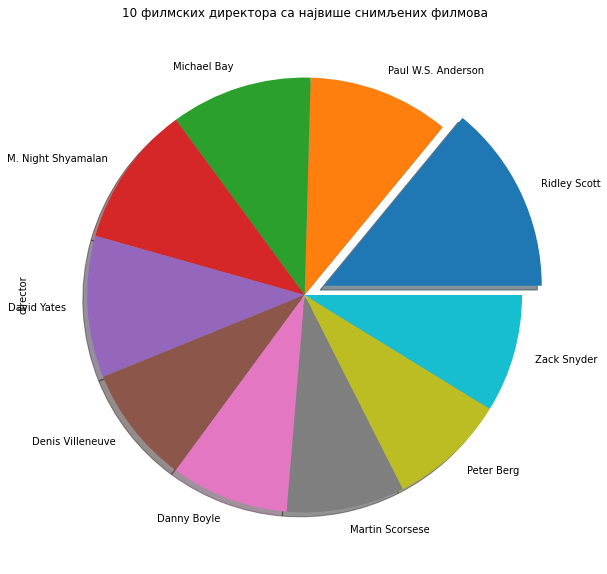

In [120]:
filmovi.director.value_counts()[:10].plot.pie(figsize=(10,10),explode=(0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),shadow=True)
plt.title('10 филмских директора са највише снимљених филмова')

Видимо да *Riddley Scott* има највише снимљених филмова.

### Заступљеност жанрова

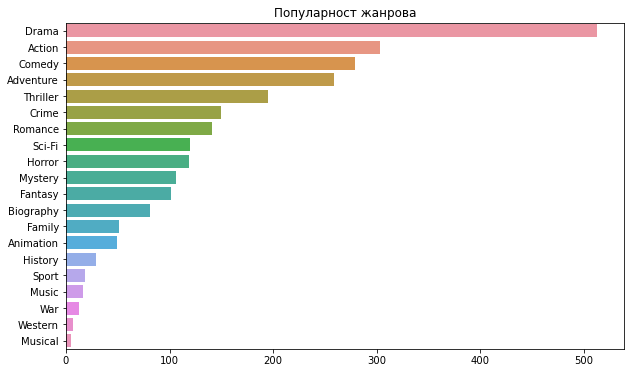

In [121]:
plt.figure(figsize=(10,6))
plt.title("Популарност жанрова")
sns.barplot(y=zanrovi_lista.index, x=zanrovi_lista)

Видимо да је драма по заступљености далеко испред свих осталих жанрова. 

### Трајање филмова

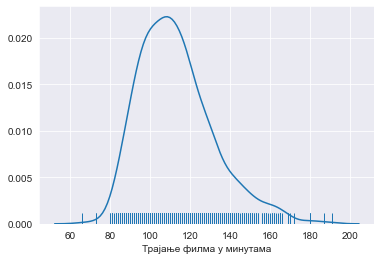

In [122]:
sns.set_style("darkgrid")

sns.distplot(filmovi.runtime_minutes, hist=False, rug=True).set(xlabel="Трајање филма у минутама");

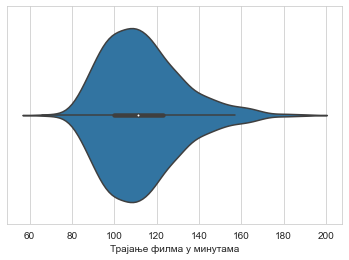

In [123]:
sns.set_style("whitegrid")

sns.violinplot(filmovi.runtime_minutes).set(xlabel="Трајање филма у минутама");

Видимо да филмови у просјеку трају неких 110-ак минута, већина њих траје приближно од 100 до 125 минута. Мањи број њих траје мање од 80 а више од 160 минута.

### У којој години је снимљено највише филмова?

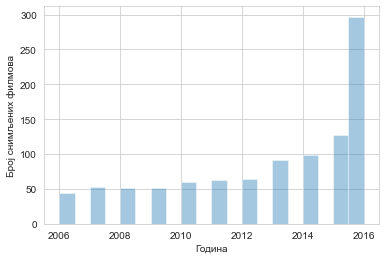

In [124]:
plt.xlabel('Година')
sns.distplot(filmovi.year, bins=20, kde=False).set(xlabel="Година", ylabel = "Број снимљених филмова");

Видимо да је у 2016. години снимљено највише филмова, слободно можемо рећи три пута више него појединачно у претходним годинама. То наравно није тачно за 2015. годину док видимо да је број снимљених филмова у 2016. години 5 пута већи од броја снимљених филмова у већини од претходних година.

### Просјечна зарада по годинама

Text(0.5, 1.0, 'Просјечна зарада по годинама')

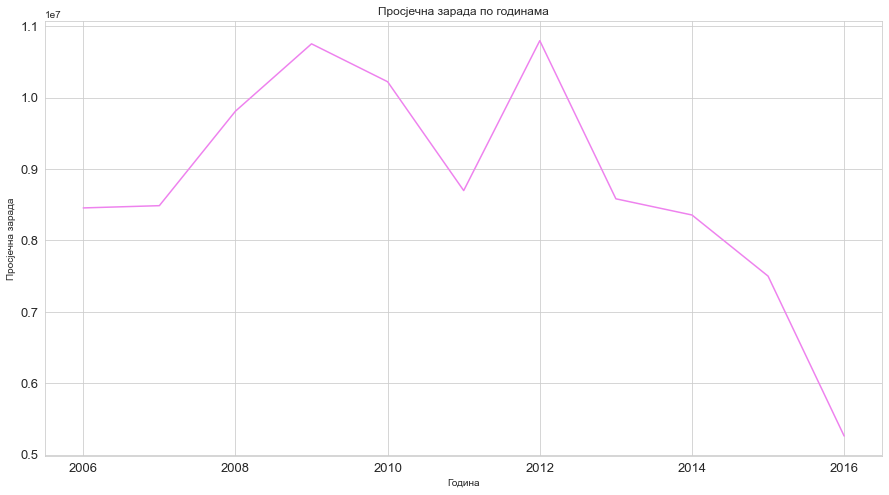

In [125]:
filmovi.groupby(['year'])['revenue'].mean().plot(kind='line', figsize=(15,8), fontsize=13, color='violet')
plt.xlabel('Година')
plt.ylabel('Просјечна зарада')
plt.title("Просјечна зарада по годинама")

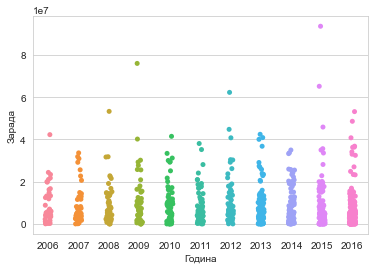

In [126]:
sns.stripplot(x="year", y="revenue", data=filmovi, jitter=True).set(xlabel="Година", ylabel = "Зарада");

Видимо да је у 2016. години најмања просјечна зарада, док је у 2012. и 2009. години највећа. Такође видимо да је филм са највећом зарадом снимљен у 2015. години.

### Зависност зараде од оцјена публике и критике те броја гласова

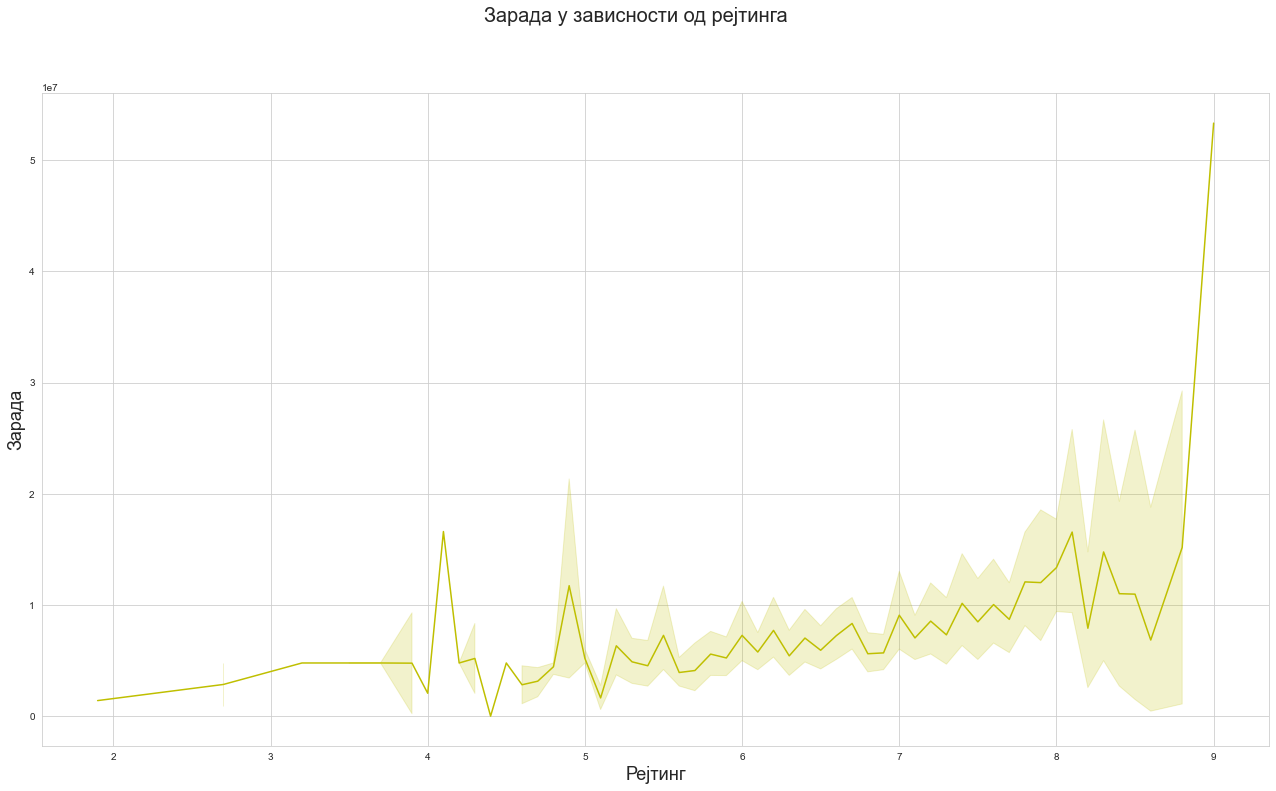

In [127]:
plt.figure(figsize=(22,12))
plt.suptitle('Зарада у зависности од рејтинга',fontsize=20)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
sns.lineplot(filmovi.rating,filmovi.revenue,color='y').set(xlabel="Рејтинг", ylabel = "Зарада")
plt.show()

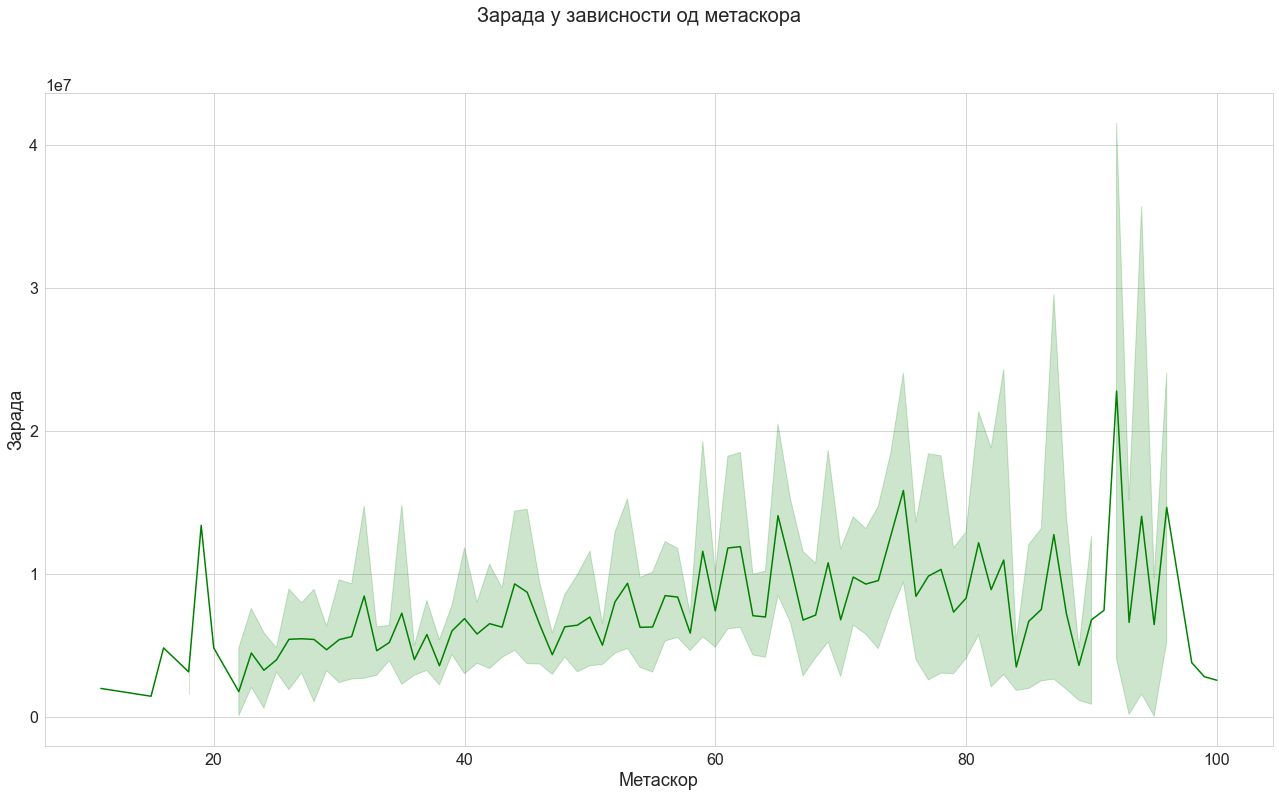

In [128]:
plt.figure(figsize=(22,12))
plt.suptitle('Зарада у зависности од метаскора',fontsize=20)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
sns.lineplot(filmovi.metascore,filmovi.revenue,color='g').set(xlabel="Метаскор", ylabel = "Зарада")
plt.show()

Оба графика изгледају слично иако постоји разлика, коју објашњава сљедеће поређење.

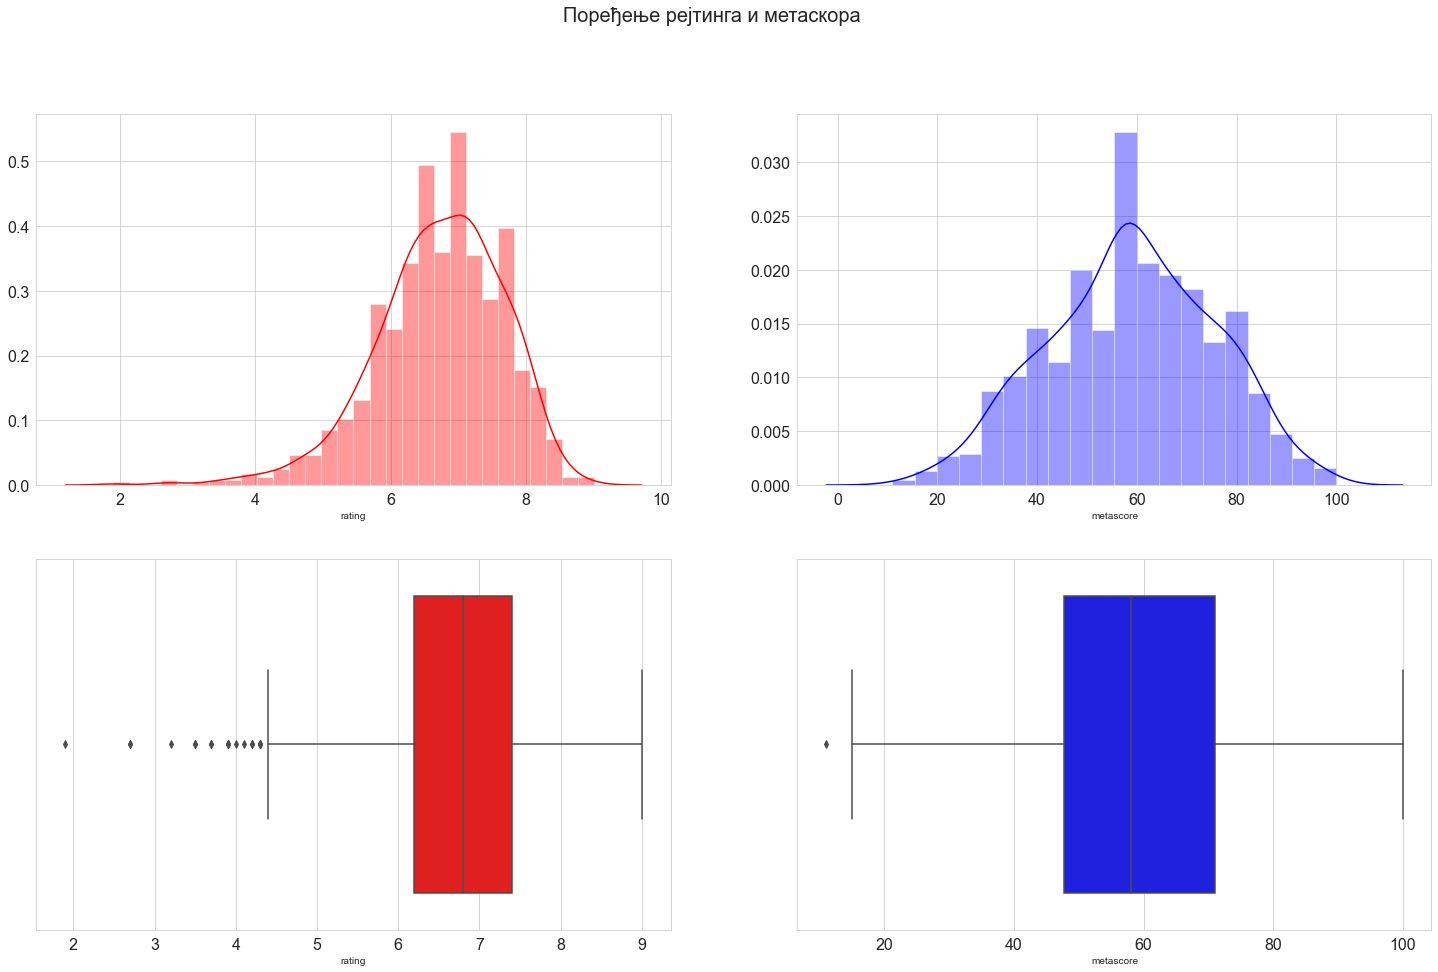

In [129]:
fig, axs = plt.subplots(2, 2, figsize=(25, 15))
plt.suptitle('Поређење рејтинга и метаскора',fontsize=20)
sns.distplot(filmovi.metascore,ax=axs[0][1],color='b')
sns.distplot(filmovi.rating,ax=axs[0][0],color='r')
sns.boxplot(filmovi.metascore,ax=axs[1][1],color='b')
sns.boxplot(filmovi.rating,ax=axs[1][0],color='r')
plt.show()

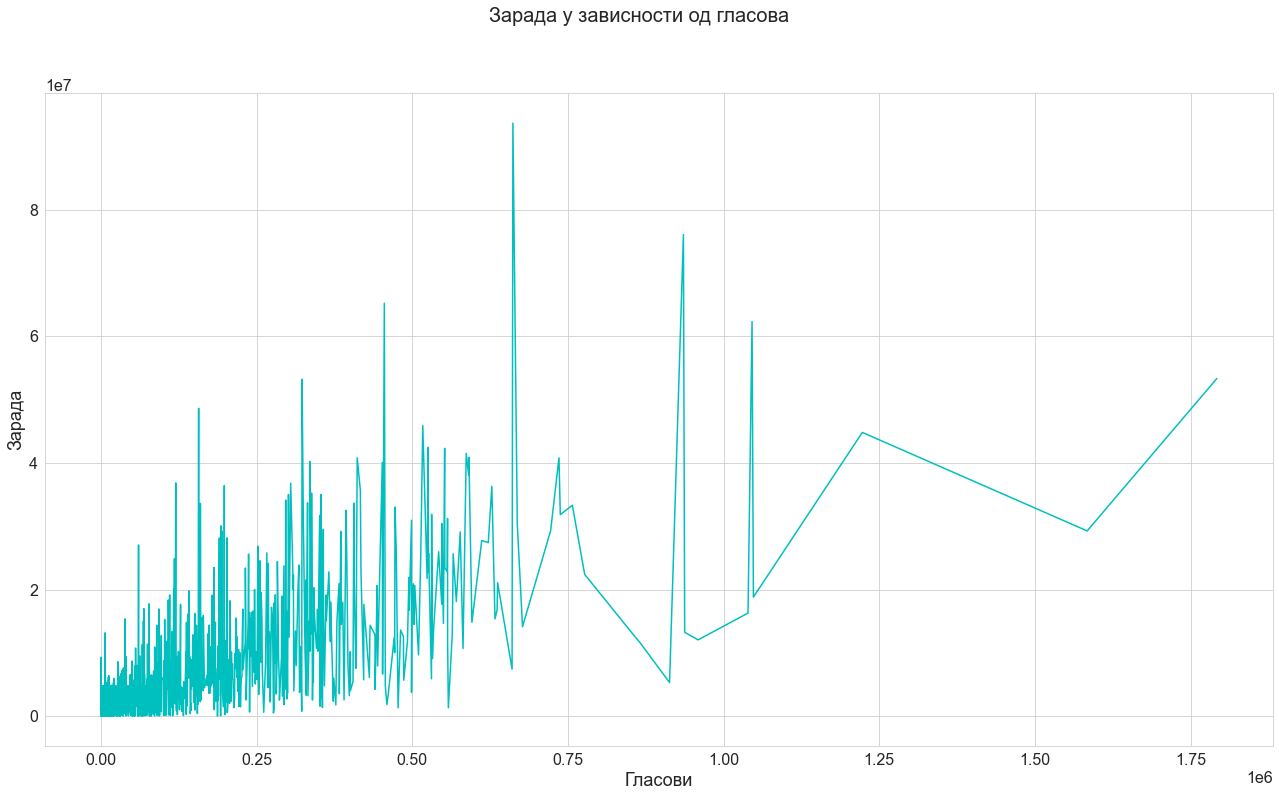

In [130]:
plt.figure(figsize=(22,12))
plt.suptitle('Зарада у зависности од гласова',fontsize=20)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
sns.lineplot(filmovi.votes,filmovi.revenue,color='c').set(xlabel="Гласови", ylabel = "Зарада")
plt.show()

Овдје видимо већи раст, занимљиво је то да је највећа корелација између зараде и броја гласова.

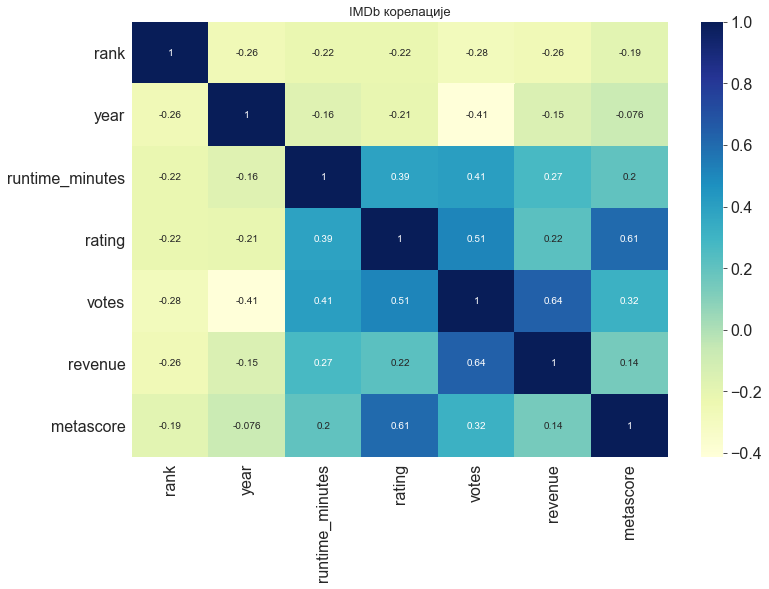

In [131]:
plt.subplots(figsize = (12, 8))
sns.heatmap(filmovi.corr(), annot = True, cmap = "YlGnBu")
plt.title("IMDb корелације", fontsize = 13)
plt.show()

Погледајмо и преостале међузависности.

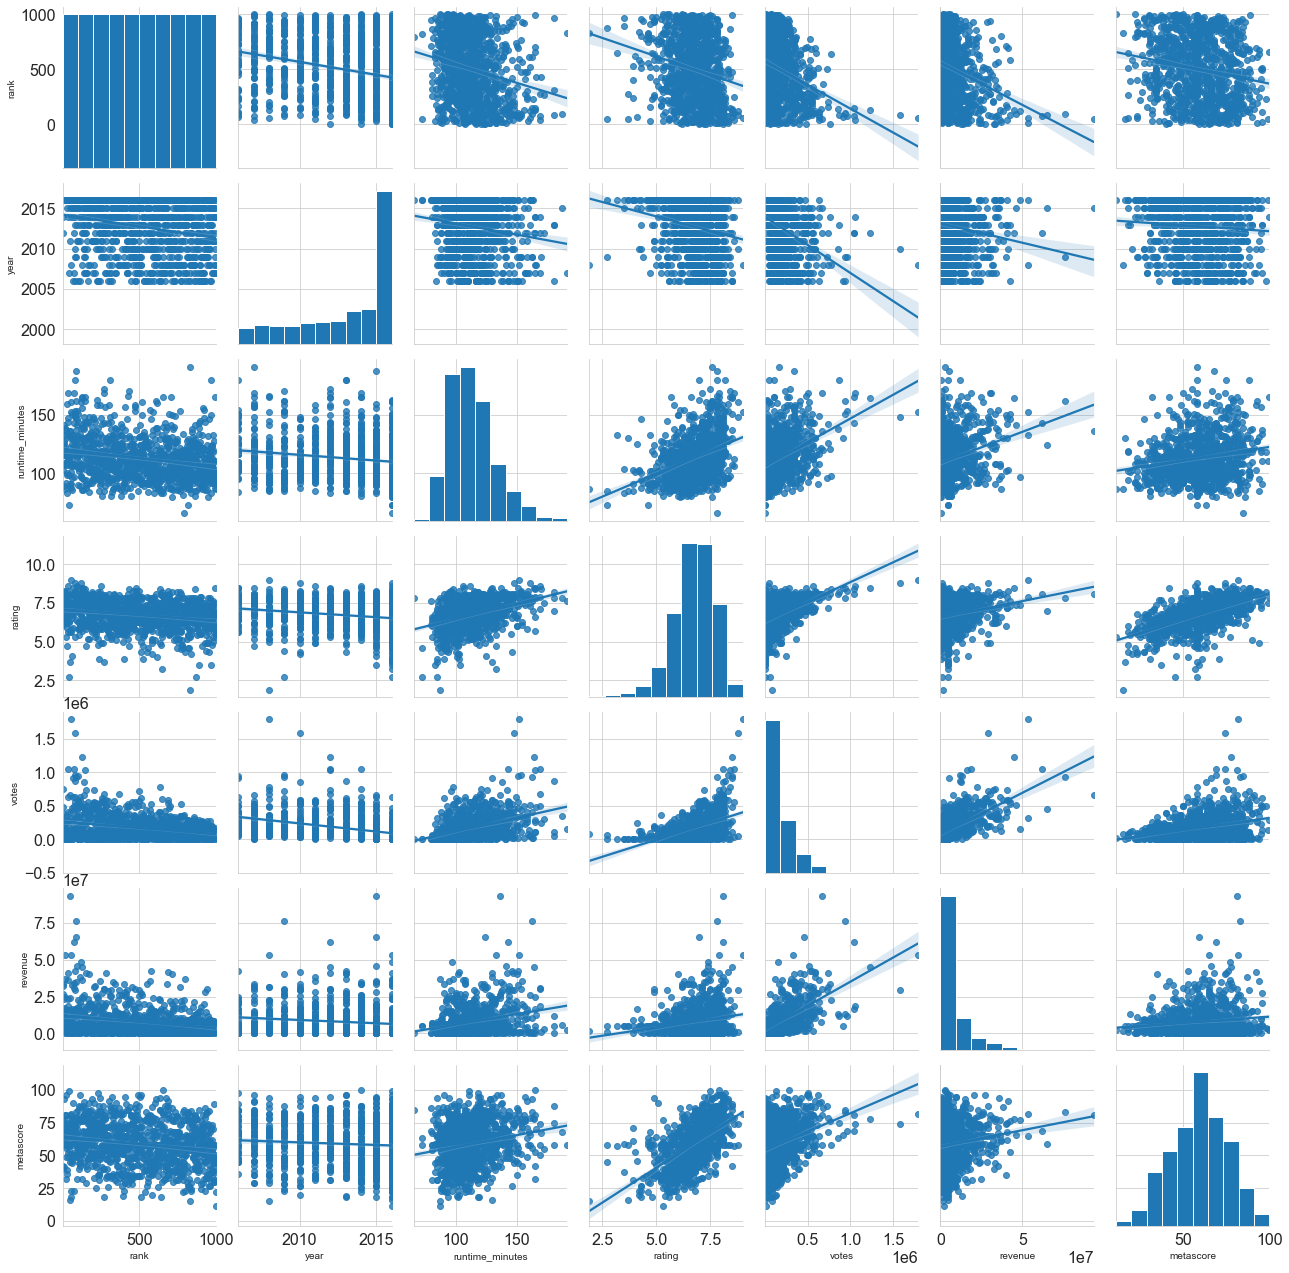

In [132]:
sns.pairplot(filmovi,kind="reg")

Погледајмо сада зависност зараде од рејтинга на тачкастом графику, при чему је величина тачака одређена висином зараде.

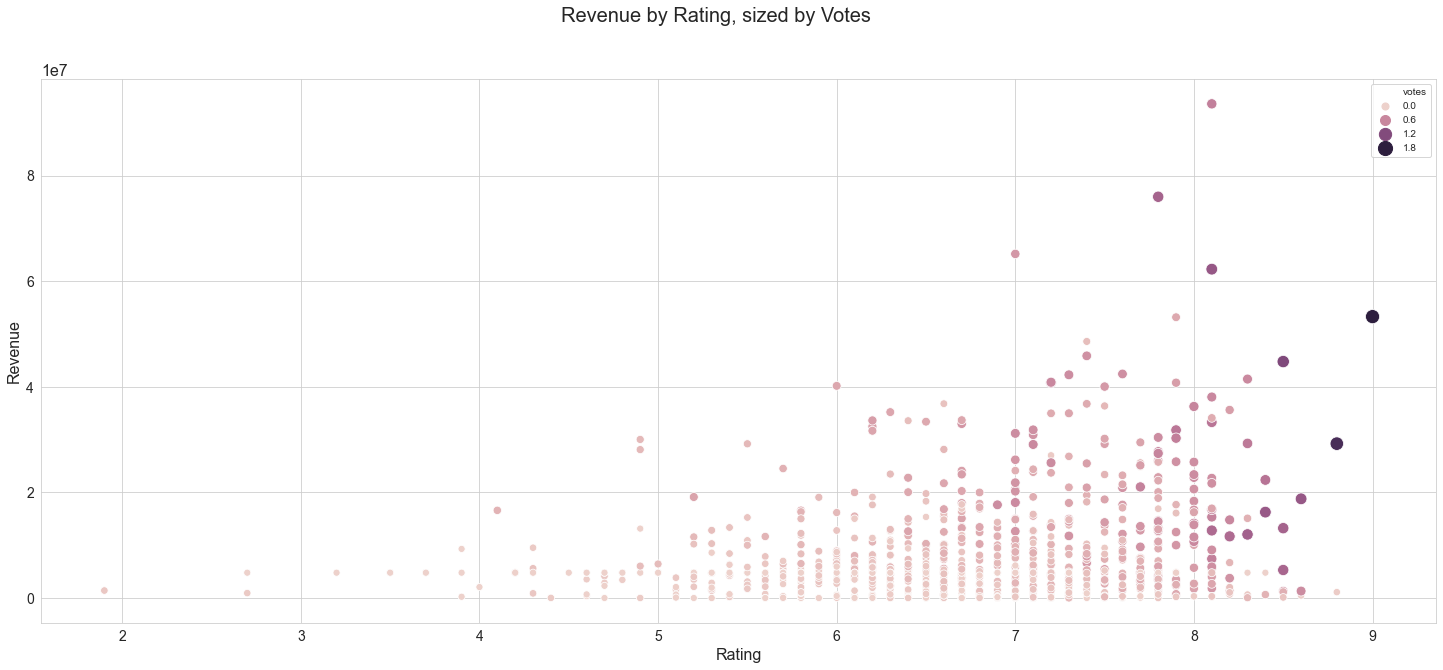

In [133]:
plt.figure(figsize=(25, 10))
plt.suptitle('Revenue by Rating, sized by Votes',fontsize=20)
sns.scatterplot(filmovi.rating,filmovi.revenue,hue=filmovi.votes,size=filmovi.votes,sizes=(50, 200))
plt.xlabel('Rating',fontsize=16)
plt.ylabel('Revenue',fontsize=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

### Просјечни рејтинг, метаскор и гласови по годинама

Податке смо скалирали тако да графици зависности наведених величина стану на један графикон.

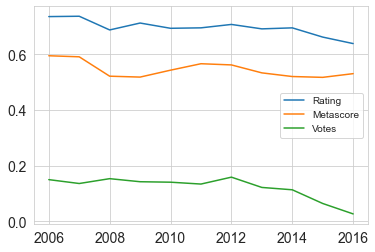

In [134]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

filmovi_s=filmovi
filmovi_s[['rating', 'metascore', 'votes']] = min_max_scaler.fit_transform(filmovi_s[['rating', 'metascore', 'votes']])

plt.plot(filmovi_s['year'].drop_duplicates().sort_values(), filmovi_s.groupby(['year'])['rating'].mean(), label = "Rating") 
plt.plot(filmovi_s['year'].drop_duplicates().sort_values(), filmovi_s.groupby(['year'])['metascore'].mean(), label = "Metascore")
plt.plot(filmovi_s['year'].drop_duplicates().sort_values(), filmovi_s.groupby(['year'])['votes'].mean(), label = "Votes") 

plt.legend() 
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

Видимо да филмови у 2016. години имају не само најмању просјечну зараду него и најмањи просјечан рејтинг и просјечан број гласова; такође имају и низак метаскор.

### Ријечи које се најчешће појављују у насловима и описима филмова

Прије него што почнемо са визуализацијом, треба да инсталирамо Пајтон библиотеку *wordcloud*. То можемо урадити на два начина, помоћу алата *conda* или *pip*:

~~~
conda install -c conda-forge wordcloud
~~~

~~~
pip install wordcloud
~~~

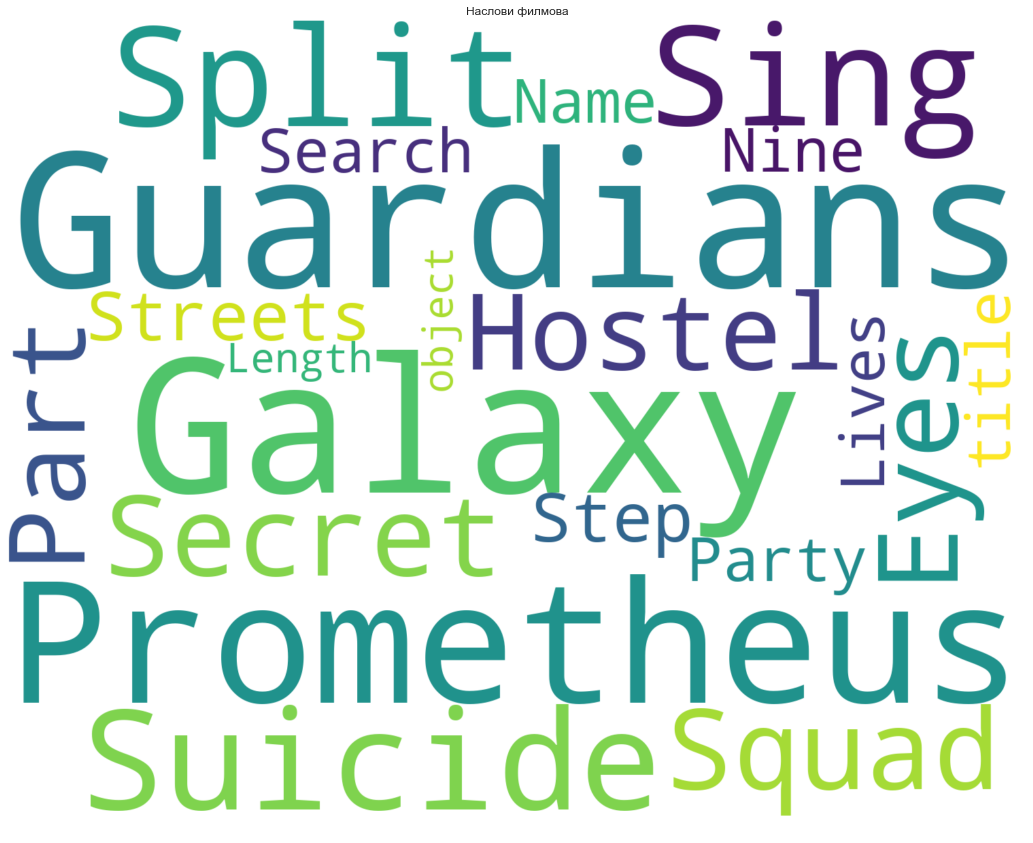

In [135]:
from wordcloud import WordCloud, STOPWORDS

stopwords=set(STOPWORDS)
stopwords.update(['One','Two','Three','La','dtype','II'])
text = (str(filmovi['title']))
plt.subplots(figsize=(20,15))
wordcloud = WordCloud(
                          stopwords=stopwords,
                          background_color='white',
                          width=1500,
                          height=1200
                         ).generate(text)


plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Наслови филмова')
plt.axis('off')
plt.show()

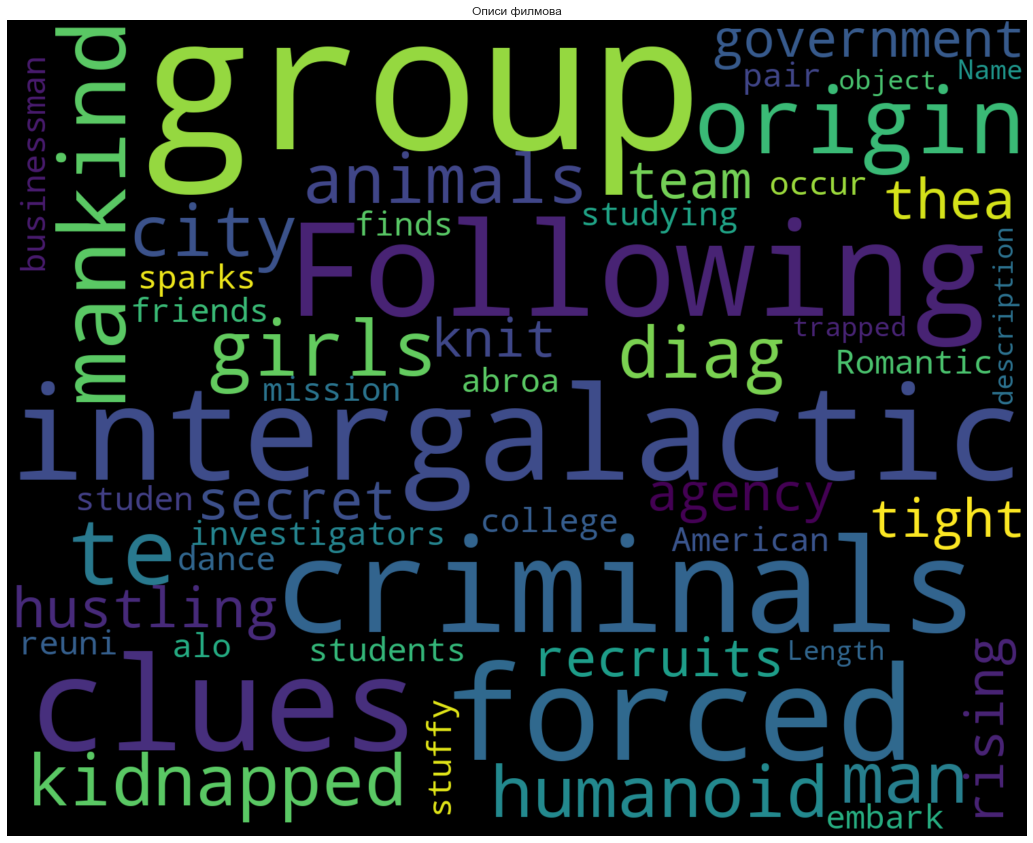

In [136]:
from wordcloud import WordCloud, STOPWORDS

stopwords=set(STOPWORDS)
stopwords.update(['One','Two','Three','La','th','two','ins','dtype'])
text = (str(filmovi['description']))
plt.subplots(figsize=(20,15))

wordcloud = WordCloud(
                          stopwords=stopwords,
                          width=1500,
                          height=1200
                         ).generate(text)


plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Описи филмова')
plt.axis('off')
plt.show()

Мислим да објашњења нису потребна, једна слика говори више од хиљаду ријечи.